<a href="https://www.kaggle.com/code/mattymyers22/s-p-500-eda-nov-21?scriptVersionId=106152429" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# S&P 500 Daily, Monthly, and Yearly Returns
*by: Matthew Myers*

Performing an exploratory data analysis (EDA) for the S&P 500. The daily returns analysis will be calculated by hand from a dataset for 1927-12-30 to 2020-11-04. The monthly and yearly returns will be calculated using the quantmod package.

Any feedback or upvote is greatly appreciated :)

Shout out to henryhan117 for the dataset \
https://www.kaggle.com/henryhan117/sp-500-historical-data \
Most up to date dataset: \
https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

In [1]:
library(tidyverse) # metapackage of all tidyverse packages
library(lubridate) # works with dates
library(quantmod) # financial analysis functionality

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "sp-500-historical-data"

In [2]:
sp <- read_csv("../input/sp-500-historical-data/SPX.csv") # load the csv
str(sp) # look at the structure of the data
head(sp) # look at the head of the data
tail(sp) # look at tail of the data

Rows: 23323 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (6): Open, High, Low, Close, Adj Close, Volume
date (1): Date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



spec_tbl_df [23,323 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date     : Date[1:23323], format: "1927-12-30" "1928-01-03" ...
 $ Open     : num [1:23323] 17.7 17.8 17.7 17.5 17.7 ...
 $ High     : num [1:23323] 17.7 17.8 17.7 17.5 17.7 ...
 $ Low      : num [1:23323] 17.7 17.8 17.7 17.5 17.7 ...
 $ Close    : num [1:23323] 17.7 17.8 17.7 17.5 17.7 ...
 $ Adj Close: num [1:23323] 17.7 17.8 17.7 17.5 17.7 ...
 $ Volume   : num [1:23323] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_date(format = ""),
  ..   Open = col_double(),
  ..   High = col_double(),
  ..   Low = col_double(),
  ..   Close = col_double(),
  ..   `Adj Close` = col_double(),
  ..   Volume = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Date,Open,High,Low,Close,Adj Close,Volume
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1927-12-30,17.66,17.66,17.66,17.66,17.66,0
1928-01-03,17.76,17.76,17.76,17.76,17.76,0
1928-01-04,17.72,17.72,17.72,17.72,17.72,0
1928-01-05,17.55,17.55,17.55,17.55,17.55,0
1928-01-06,17.66,17.66,17.66,17.66,17.66,0
1928-01-09,17.50,17.50,17.50,17.50,17.50,0


Date,Open,High,Low,Close,Adj Close,Volume
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-10-28,3342.48,3342.48,3268.89,3271.03,3271.03,5129860000
2020-10-29,3277.17,3341.05,3259.82,3310.11,3310.11,4903070000
2020-10-30,3293.59,3304.93,3233.94,3269.96,3269.96,4840450000
2020-11-02,3296.20,3330.14,3279.74,3310.24,3310.24,4310590000
2020-11-03,3336.25,3389.49,3336.25,3369.16,3369.16,4220070000
2020-11-04,3406.46,3486.25,3405.17,3443.44,3443.44,4783040000


## 1. Data Cleaning

At first glance, there are a couple data cleaning tasks I want to sort out to make myself feel better before jumping into my anlyses.\
Data cleaning tasks:
* Adj Close column name as two words
* What to do for days with no volume and no price change


In [3]:
#rename Adj Close
sp <- rename(sp, c("adj_close" = "Adj Close"))
head(sp)

Date,Open,High,Low,Close,adj_close,Volume
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1927-12-30,17.66,17.66,17.66,17.66,17.66,0
1928-01-03,17.76,17.76,17.76,17.76,17.76,0
1928-01-04,17.72,17.72,17.72,17.72,17.72,0
1928-01-05,17.55,17.55,17.55,17.55,17.55,0
1928-01-06,17.66,17.66,17.66,17.66,17.66,0
1928-01-09,17.50,17.50,17.50,17.50,17.50,0


In [4]:
# filter data for no volume
filter(sp, Volume == 0)

Date,Open,High,Low,Close,adj_close,Volume
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1927-12-30,17.66,17.66,17.66,17.66,17.66,0
1928-01-03,17.76,17.76,17.76,17.76,17.76,0
1928-01-04,17.72,17.72,17.72,17.72,17.72,0
1928-01-05,17.55,17.55,17.55,17.55,17.55,0
1928-01-06,17.66,17.66,17.66,17.66,17.66,0
1928-01-09,17.50,17.50,17.50,17.50,17.50,0
1928-01-10,17.37,17.37,17.37,17.37,17.37,0
1928-01-11,17.35,17.35,17.35,17.35,17.35,0
1928-01-12,17.47,17.47,17.47,17.47,17.47,0


In [5]:
# filter for data with volume
sp_vol <- filter(sp, Volume != 0)
sp_vol

Date,Open,High,Low,Close,adj_close,Volume
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000
1950-01-10,17.03,17.03,17.03,17.03,17.03,2160000
1950-01-11,17.09,17.09,17.09,17.09,17.09,2630000
1950-01-12,16.76,16.76,16.76,16.76,16.76,2970000
1950-01-13,16.67,16.67,16.67,16.67,16.67,3330000


It seems that the data for volume goes back to 1950 although there still isn't any difference between the various prices throughout the days starting in 1950. Now to narrow down even more to the years which have recorded changes from open, close, high, and low on the day. Going forward, I will use the adjusted close as the true close when calculating returns.

In [6]:
# create column of daily returns
sp_vol <- sp_vol %>%
  mutate(days_return = (adj_close - Open) / Open)
sp_vol

Date,Open,High,Low,Close,adj_close,Volume,days_return
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000,0
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000,0
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000,0
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000,0
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000,0
1950-01-10,17.03,17.03,17.03,17.03,17.03,2160000,0
1950-01-11,17.09,17.09,17.09,17.09,17.09,2630000,0
1950-01-12,16.76,16.76,16.76,16.76,16.76,2970000,0
1950-01-13,16.67,16.67,16.67,16.67,16.67,3330000,0


In [7]:
#create column for year
sp_vol <- sp_vol %>%
  mutate(year = year(Date))
sp_vol

#summarize returns each year
tapply(sp_vol$days_return, sp_vol$year, summary)

Date,Open,High,Low,Close,adj_close,Volume,days_return,year
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000,0,1950
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000,0,1950
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000,0,1950
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000,0,1950
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000,0,1950
1950-01-10,17.03,17.03,17.03,17.03,17.03,2160000,0,1950
1950-01-11,17.09,17.09,17.09,17.09,17.09,2630000,0,1950
1950-01-12,16.76,16.76,16.76,16.76,16.76,2970000,0,1950
1950-01-13,16.67,16.67,16.67,16.67,16.67,3330000,0,1950


$`1950`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

$`1951`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

$`1952`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

$`1953`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

$`1954`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

$`1955`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

$`1956`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

$`1957`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

$`1958`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

$`1959`
   Min. 1st Qu.  Median    Me

Looks like 1962 was the first year that recorded changes between the open, close, high, and low prices each day. I'll filter the data for 1961 and 1962 seperately just to be sure.

In [8]:
#look at the year 1961
filter(sp_vol, year == 1961)

Date,Open,High,Low,Close,adj_close,Volume,days_return,year
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1961-01-03,57.57,57.57,57.57,57.57,57.57,2770000,0,1961
1961-01-04,58.36,58.36,58.36,58.36,58.36,3840000,0,1961
1961-01-05,58.57,58.57,58.57,58.57,58.57,4130000,0,1961
1961-01-06,58.40,58.40,58.40,58.40,58.40,3620000,0,1961
1961-01-09,58.81,58.81,58.81,58.81,58.81,4210000,0,1961
1961-01-10,58.97,58.97,58.97,58.97,58.97,4840000,0,1961
1961-01-11,59.14,59.14,59.14,59.14,59.14,4370000,0,1961
1961-01-12,59.32,59.32,59.32,59.32,59.32,4270000,0,1961
1961-01-13,59.60,59.60,59.60,59.60,59.60,4520000,0,1961


In [9]:
#look at the year 1962
filter(sp_vol, year == 1962)

Date,Open,High,Low,Close,adj_close,Volume,days_return,year
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1962-01-02,71.55,71.96,70.71,70.96,70.96,3120000,-0.0082460374,1962
1962-01-03,70.96,71.48,70.38,71.13,71.13,3590000,0.0023956877,1962
1962-01-04,71.13,71.62,70.45,70.64,70.64,4450000,-0.0068887673,1962
1962-01-05,70.64,70.84,69.35,69.66,69.66,4630000,-0.0138730891,1962
1962-01-08,69.66,69.84,68.17,69.12,69.12,4620000,-0.0077519519,1962
1962-01-09,69.12,69.93,68.83,69.15,69.15,3600000,0.0004340133,1962
1962-01-10,69.15,69.58,68.62,68.96,68.96,3300000,-0.0027476933,1962
1962-01-11,68.96,69.54,68.57,69.37,69.37,3390000,0.0059455337,1962
1962-01-12,69.37,70.17,69.23,69.61,69.61,3730000,0.0034596798,1962


Can confirm that the start of 1962 is when daily returns start to be registered. Now to filter the data frame to start with that year.

In [10]:
#filter data to start with 1962 and round days_return to percentages
sp_vol <- sp_vol %>%
  filter(year >= 1962) %>%
  mutate(days_return = round(days_return, digits = 4)) %>%
  mutate(days_return = days_return * 100)
sp_vol

Date,Open,High,Low,Close,adj_close,Volume,days_return,year
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1962-01-02,71.55,71.96,70.71,70.96,70.96,3120000,-0.82,1962
1962-01-03,70.96,71.48,70.38,71.13,71.13,3590000,0.24,1962
1962-01-04,71.13,71.62,70.45,70.64,70.64,4450000,-0.69,1962
1962-01-05,70.64,70.84,69.35,69.66,69.66,4630000,-1.39,1962
1962-01-08,69.66,69.84,68.17,69.12,69.12,4620000,-0.78,1962
1962-01-09,69.12,69.93,68.83,69.15,69.15,3600000,0.04,1962
1962-01-10,69.15,69.58,68.62,68.96,68.96,3300000,-0.27,1962
1962-01-11,68.96,69.54,68.57,69.37,69.37,3390000,0.59,1962
1962-01-12,69.37,70.17,69.23,69.61,69.61,3730000,0.35,1962


## 2. Analysis
For this session, we will look at trends within returns on a daily, monthly, and yearly basis.

* Daily Returns

In [11]:
summary(sp_vol$days_return) # summarize the daily returns
sd(sp_vol$days_return) # calculate standard deviation of daily returns

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-20.47000  -0.41000   0.04000   0.02852   0.49000  10.79000 

[1] 0.9810931

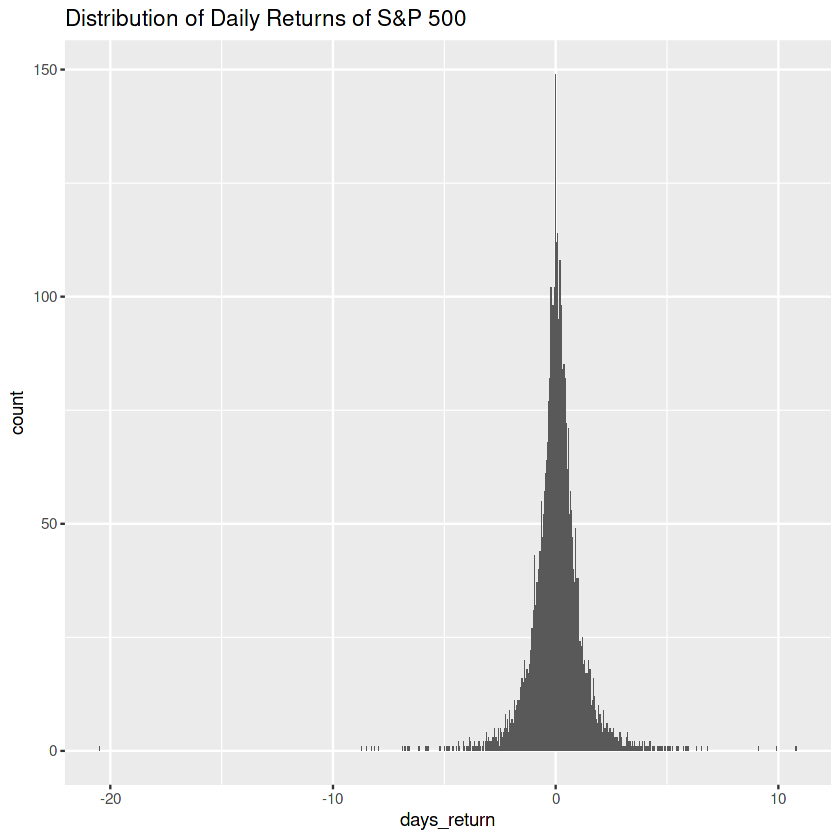

In [12]:
#visual interpretation
day_return_dist <- ggplot(sp_vol, aes(x = days_return)) +
  geom_bar() +
  labs(title = "Distribution of Daily Returns of S&P 500")
day_return_dist

It appears to be a normal distribution for daily returns of the S&P 500. The standard deviation being about 0.98% change in the price of the index which means about 2/3 of the daily returns fall between -0.98% and +0.98%. Also, the median and mean both being positive shows that there are more up days than down days. :)

Next, we will look at the top and worst 20 days as well as what years they fall under. 

In [13]:
# top 20 daily returns
top_20_days <- sp_vol %>%
  top_n(20, days_return) %>%
  arrange(desc(days_return))
top_20_days

Date,Open,High,Low,Close,adj_close,Volume,days_return,year
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2008-10-28,848.92,940.51,845.27,940.51,940.51,7096950000,10.79,2008
2008-10-13,912.75,1006.93,912.75,1003.35,1003.35,7263370000,9.93,2008
1987-10-21,236.83,259.27,236.83,258.38,258.38,449600000,9.10,1987
2008-11-13,853.13,913.01,818.69,911.29,911.29,7849120000,6.82,2008
2009-03-23,772.31,823.37,772.31,822.92,822.92,7715770000,6.55,2009
2008-11-24,801.20,865.60,801.20,851.81,851.81,7879440000,6.32,2008
2009-03-10,679.28,719.60,679.28,719.60,719.60,8618330000,5.94,2009
2008-11-21,755.84,801.20,741.02,800.03,800.03,9495900000,5.85,2008
2002-07-24,797.71,844.32,775.68,843.43,843.43,2775560000,5.73,2002


The top 20 days range from +4.76% to +10.79% for the S&P 500.

In [14]:
# distribution of years with a top 20 day
top_day_years <- top_20_days %>%
  count(year(Date)) %>%
  arrange(desc(n)) %>%
  rename("Year" = "year(Date)", "Count" = "n") %>%
  mutate(Year = as.character(Year), Type = "Top")
top_day_years

Year,Count,Type
<chr>,<int>,<chr>
2008,6,Top
1987,3,Top
2002,2,Top
2009,2,Top
2020,2,Top
1970,1,Top
1997,1,Top
1998,1,Top
2000,1,Top


2008 had the most top 20 days with 6, doubling that of the next highest (1987) with 3.

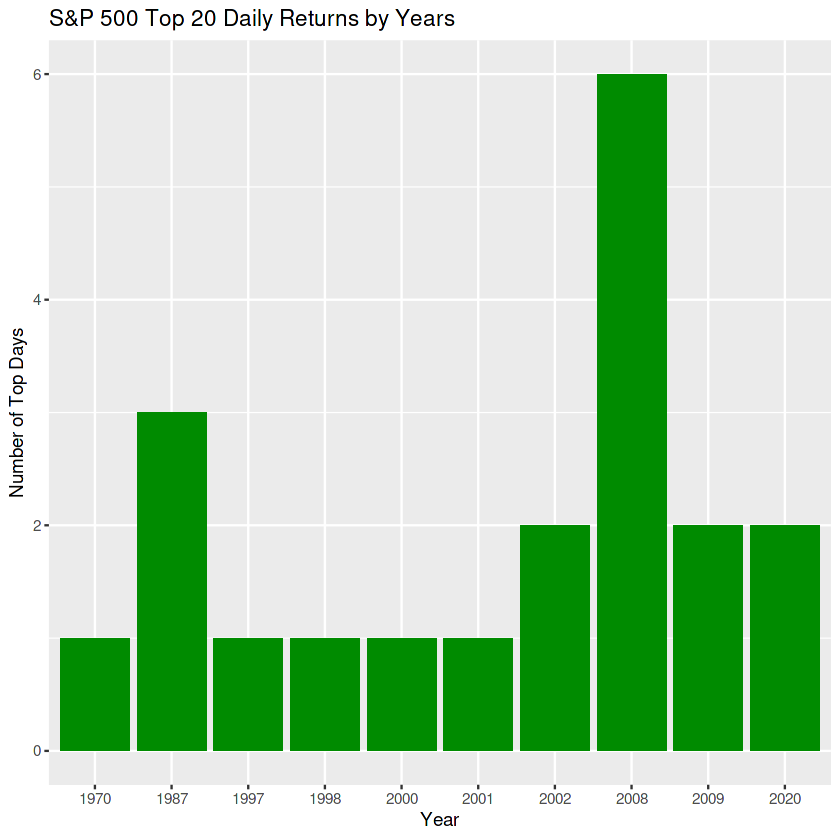

In [15]:
#graphical representation of top days by year
top_20 <- ggplot(top_day_years, aes(x = Year, y = Count)) +
  geom_col(fill = "green4") +
  labs(y = "Number of Top Days", title = "S&P 500 Top 20 Daily Returns by Years")
top_20

Now to look into the worst 20 days in S&P 500 history.

In [16]:
# look at the 20 worst days
worst_20_days <- sp_vol %>%
  top_n(-20, days_return) %>%
  arrange(days_return)
worst_20_days

Date,Open,High,Low,Close,adj_close,Volume,days_return,year
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1987-10-19,282.70,282.70,224.83,224.84,224.84,604300000,-20.47,1987
2008-10-15,994.60,994.60,903.99,907.84,907.84,6542330000,-8.72,2008
2008-09-29,1209.07,1209.07,1106.42,1106.42,1106.42,7305060000,-8.49,2008
1987-10-26,248.20,248.22,227.26,227.67,227.67,308800000,-8.27,1987
2008-12-01,888.61,888.61,815.69,816.21,816.21,6052010000,-8.15,2008
2008-10-09,988.42,1005.25,909.19,909.92,909.92,6819000000,-7.94,2008
1997-10-27,941.64,941.64,876.73,876.99,876.99,693730000,-6.87,1997
1998-08-31,1027.14,1033.47,957.28,957.28,957.28,917500000,-6.80,1998
1988-01-08,261.05,261.07,242.95,243.40,243.40,197300000,-6.76,1988


The worst 20 days range from -20.47% to -5.22%. This is a much larger range than the top 20 days.

In [17]:
# years with a worst 20 day
worst_day_years <- worst_20_days %>%
  count(year(Date)) %>%
  arrange(desc(n)) %>%
  rename("Year" = "year(Date)", "Count" = "n") %>%
  mutate(Year = as.character(Year), Type = "Worst")
worst_day_years

Year,Count,Type
<chr>,<int>,<chr>
2008,8,Worst
1987,2,Worst
2020,2,Worst
1962,1,Worst
1988,1,Worst
1989,1,Worst
1997,1,Worst
1998,1,Worst
2000,1,Worst


2008 as the highest count of worst days by far as well. Let's look at how the count of top and worst days stack up.

In [18]:
# join the tables
top_worst_day_df <- merge(x = top_day_years, y = worst_day_years, 
                          by = c("Year", "Count", "Type"), all = TRUE)
top_worst_day_df

Year,Count,Type
<chr>,<int>,<chr>
1962,1,Worst
1970,1,Top
1987,2,Worst
1987,3,Top
1988,1,Worst
1989,1,Worst
1997,1,Top
1997,1,Worst
1998,1,Top


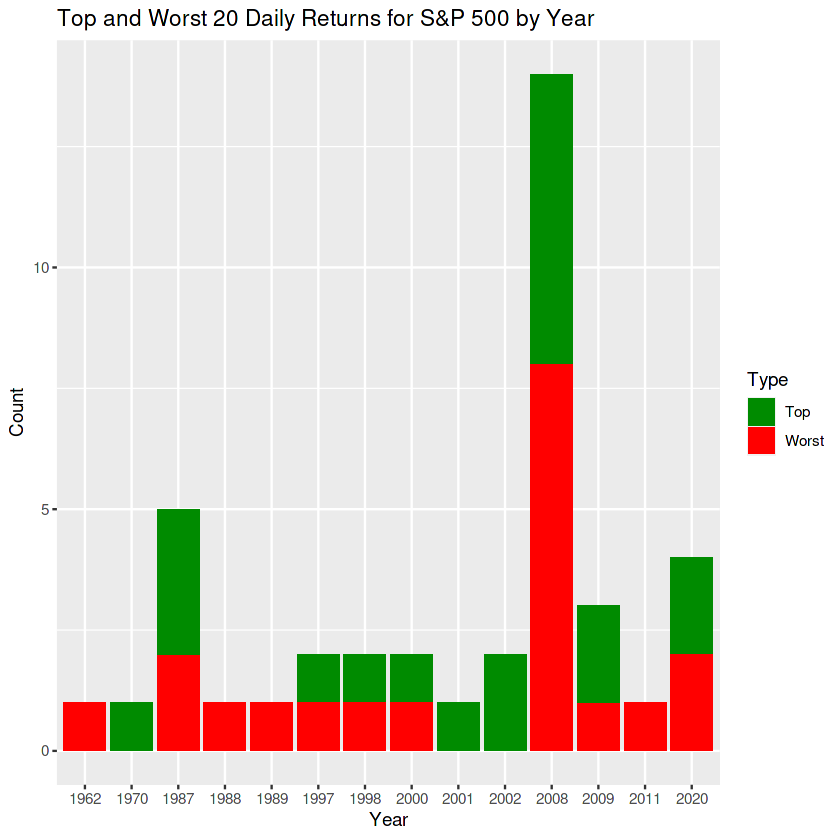

In [19]:
#graphical representation of the worst days
top_worst_20 <- ggplot(top_worst_day_df, aes(x = Year, y = Count, fill = Type)) +
  geom_col() +
  scale_fill_manual(values = c("Top" = "green4", "Worst" = "red")) +
  labs(title = "Top and Worst 20 Daily Returns for S&P 500 by Year")
top_worst_20

* Monthly Returns

While looking into ideas for calculating monthly and yearly returns by hand, I found the package quantmod. We will be using that for pulling financial data and calculating returns going forward.

In [20]:
# get data object quantmod
initialDate <- "1930-01-01"
endDate <- "2020-12-31"
getSymbols("^GSPC", src = "yahoo", from = initialDate, to = endDate)

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "^GSPC"

In [21]:
# get monthly returns data as a clean data frame
monthly_returns <- as.data.frame(monthlyReturn(GSPC))

#get rid of dates as row names
monthly_returns <- monthly_returns %>%
  mutate(date = rownames(monthly_returns))
row.names(monthly_returns) <- NULL

#create factor levels for months
factor_mon <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep",
                "Oct", "Nov", "Dec")

#perform the df manipulations
monthly_returns <- monthly_returns %>%
  select(date, monthly.returns) %>%
  mutate(date = as.Date(date, "%Y-%m-%d"), 
        monthly.returns = round(monthly.returns, digits = 3) * 100, 
        date = format(date, "%b %Y"), months = word(date, 1), 
        year = word(date, 2)) %>%
  mutate(months = as.factor(months), months = factor(months, levels = factor_mon))
  
head(monthly_returns)

,date,monthly.returns,months,year
,<chr>,<dbl>,<fct>,<chr>
1,Jan 1930,7.6,Jan,1930
2,Feb 1930,2.2,Feb,1930
3,Mar 1930,3.7,Mar,1930
4,Apr 1930,3.1,Apr,1930
5,May 1930,-1.6,May,1930
6,Jun 1930,-16.5,Jun,1930


In [22]:
#look at 20 top months
top_20_months <- monthly_returns %>%
  top_n(20, monthly.returns) %>%
  arrange(desc(monthly.returns))
top_20_months

date,monthly.returns,months,year
<chr>,<dbl>,<fct>,<chr>
Aug 1932,39.1,Aug,1932
Jul 1932,36.1,Jul,1932
Apr 1933,33.8,Apr,1933
Jun 1938,24.7,Jun,1938
May 1933,23.1,May,1933
Oct 1974,16.3,Oct,1974
Apr 1938,15.1,Apr,1938
Sep 1939,14.4,Sep,1939
Jun 1931,13.9,Jun,1931


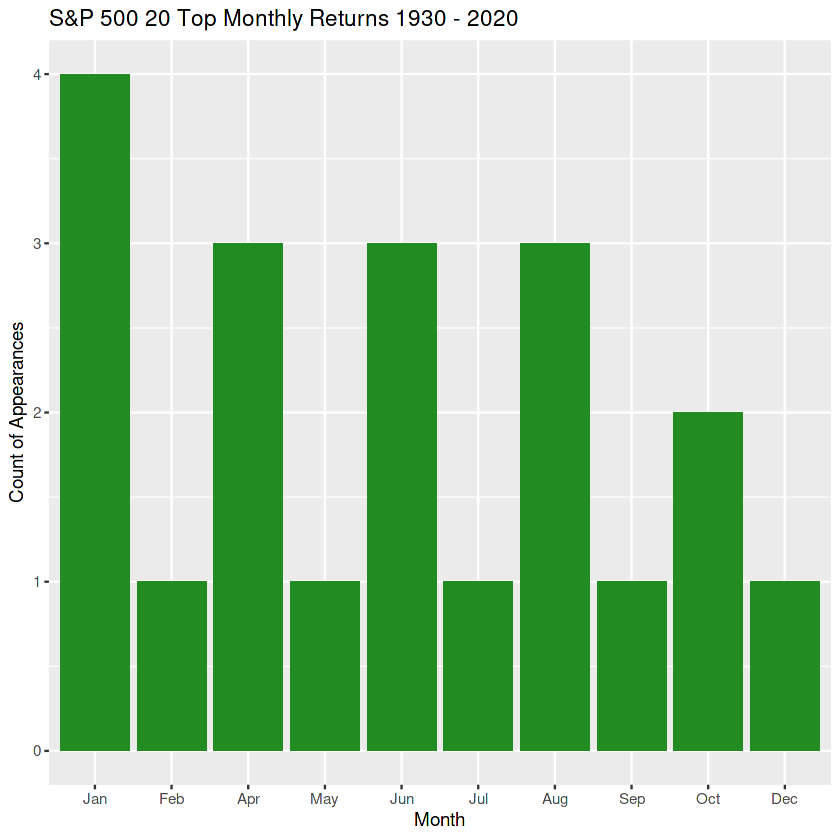

In [23]:
#graph of top 20 appearances
top_mon_gr <- ggplot(top_20_months, aes(months)) +
                geom_bar(fill = "forestgreen") +
                labs(x = "Month", y = "Count of Appearances", 
                    title = "S&P 500 20 Top Monthly Returns 1930 - 2020")
top_mon_gr

January has the most appearances in the top 20 monthly returns of the S&P 500. Mar and Nov are the only months without a top 20 return.

In [24]:
#look at 20 worst months
worst_20_months <- monthly_returns %>%
  top_n(-20, monthly.returns) %>%
  arrange(monthly.returns)
worst_20_months

date,monthly.returns,months,year
<chr>,<dbl>,<fct>,<chr>
Sep 1931,-29.9,Sep,1931
Mar 1938,-25.0,Mar,1938
May 1940,-24.0,May,1940
May 1932,-23.3,May,1932
Oct 1987,-21.8,Oct,1987
Apr 1932,-20.2,Apr,1932
Feb 1933,-18.4,Feb,1933
Oct 2008,-16.9,Oct,2008
Jun 1930,-16.5,Jun,1930


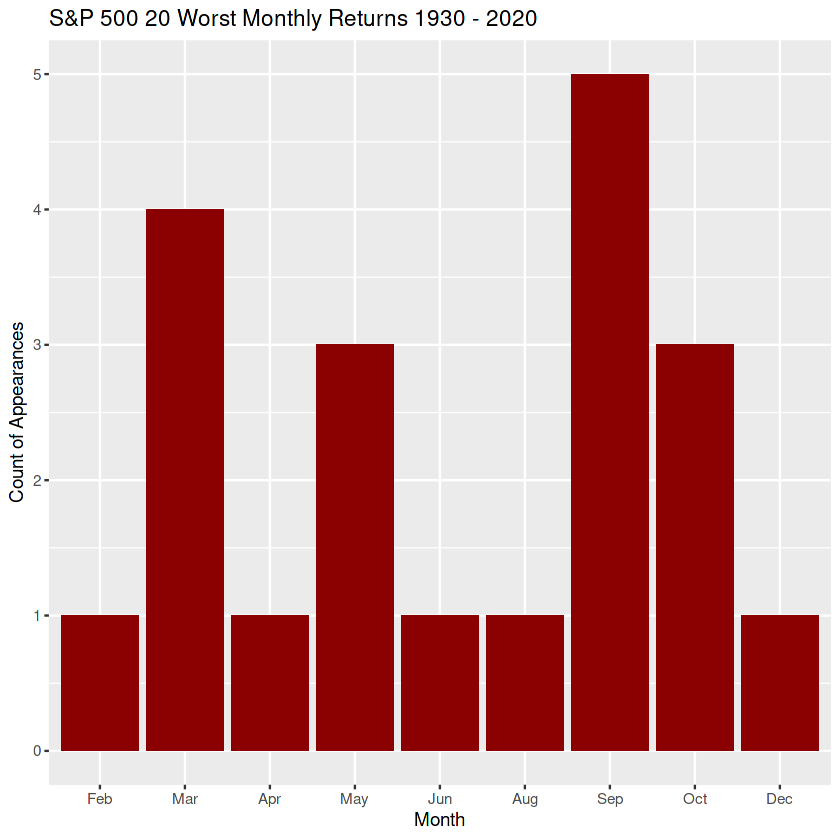

In [25]:
#worst 20 monthly returns chart
worst_mon_gr <- ggplot(worst_20_months, aes(factor(months, levels = factor_mon))) +
                geom_bar(fill = "darkred") +
                labs(x = "Month", y = "Count of Appearances", 
                    title = "S&P 500 20 Worst Monthly Returns 1930 - 2020")
worst_mon_gr

Regarding the negative outliers, September appears the most within the list of worst 20 monthly returns for the S&P. Jan, Jul, and Nov are the three months that don't appear in the list of worst 20 monthly returns. 

Only looking at the top and worst monthly returns doesn't show the whole picture regarding historical trends for monthly returns. Next we will look at the distribution of monthly returns for each month.

In [26]:
#summarize monthly returns by months
tapply(monthly_returns$monthly.returns, monthly_returns$months, summary)

$Jan
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -8.600  -2.600   1.500   1.213   4.250  13.200 

$Feb
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-18.40000  -2.90000   0.40000  -0.08571   2.60000  11.40000 

$Mar
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-25.0000  -1.5000   0.9000   0.2945   3.2000   9.7000 

$Apr
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-20.200  -1.450   0.900   1.396   3.950  33.800 

$May
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-24.00000  -2.30000   1.10000  -0.01429   3.25000  23.10000 

$Jun
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-16.5000  -1.8000   0.2000   0.7011   3.1500  24.7000 

$Jul
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-11.500  -1.600   1.300   1.553   4.650  36.100 

$Aug
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-14.6000  -2.1500   0.8000   0.5308   2.8000  39.1000 

$Sep
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-29.900  -3.250  -0.300  -1.01

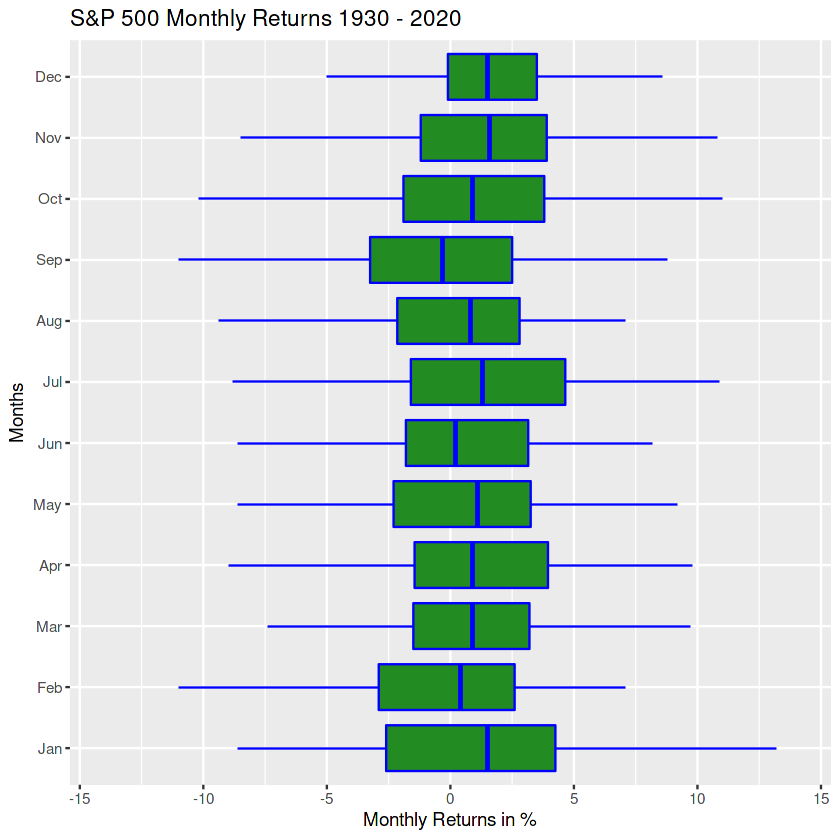

In [27]:
#graphing the box plots
mon_gr <- ggplot(monthly_returns, aes(monthly.returns, months)) +
            geom_boxplot(outlier.shape = NA, color = "blue", fill = "forestgreen") +
            coord_cartesian(xlim = c(-14, 14)) +
            labs(x = "Monthly Returns in %", y = "Months", 
                title = "S&P 500 Monthly Returns 1930 - 2020")
mon_gr

By removing the outliers from the boxplot, we are able to have a more concentrated look into the various ranges of monthly returns by month. Looking over these results, September stands out as being the only month with more than 50% of the time having resulted in a negative monthly return. December appears to have the most concentrated interquartile range (50% of all observations from 1st quartile to 3rd quartile) of monthly returns, ranging from a return of -0.1% to 3.5%. All other months have a 1st quartile that starts less than -1% in monthly return.

* Yearly Returns

In [28]:
#get yearly returns data as a data frame
yearly_returns <- as.data.frame(yearlyReturn(GSPC))

#get rid of dates as row names
yearly_returns <- yearly_returns %>%
  mutate(year = rownames(yearly_returns))
row.names(yearly_returns) <- NULL

#clean up the df
yearly_returns <- yearly_returns %>%
  select(year, yearly.returns) %>%
  mutate(year = as.Date(year, "%Y-%m-%d"), 
        yearly.returns = round(yearly.returns, digits = 3) * 100,
        year = format(year, "%Y"))
  
yearly_returns

year,yearly.returns
<chr>,<dbl>
1930,-27.6
1931,-47.1
1932,-14.8
1933,44.1
1934,-4.7
1935,41.4
1936,27.9
1937,-38.6
1938,24.5


In [29]:
#summary stats of yearly returns
summary(yearly_returns$yearly.returns)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-47.100  -4.950  10.800   7.652  20.200  45.000 

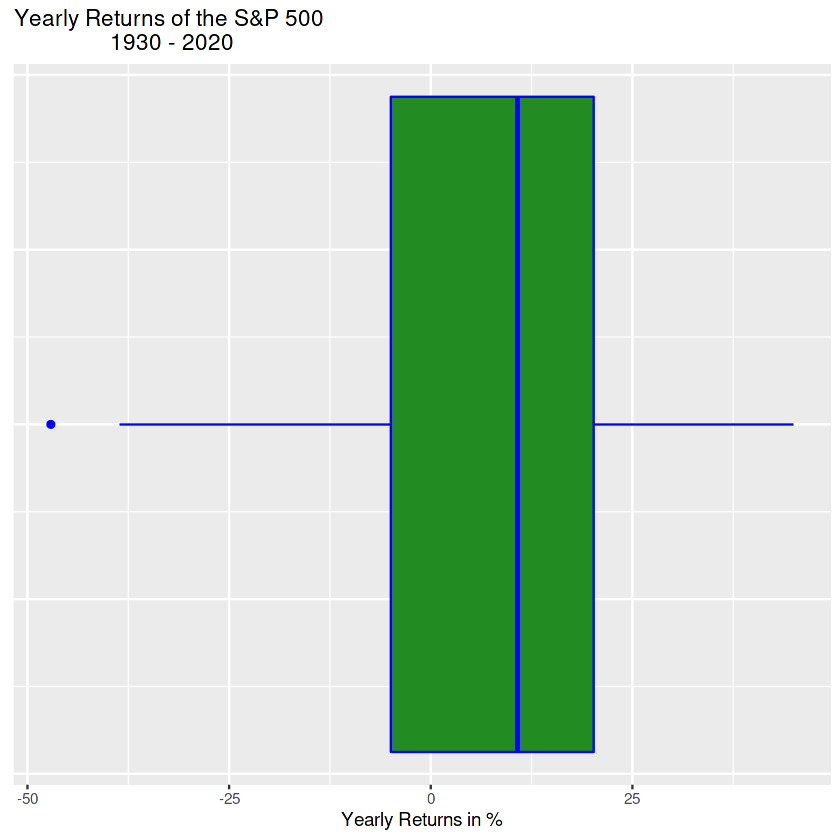

In [30]:
#boxplot of returns
yr_gr <- ggplot(yearly_returns, aes(yearly.returns)) +
           geom_boxplot(color = "blue", fill = "forestgreen") +
           theme(axis.title.y = element_blank(), axis.text.y = element_blank(),
                axis.ticks.y = element_blank()) +
           labs(x = "Yearly Returns in %", title = "Yearly Returns of the S&P 500 
                1930 - 2020")
yr_gr

On average, the S&P 500 has a yearly return of +7.652% with a median of +10.8%. That shows that 50% of the time, the S&P 500 has had a yearly return >= +10.8%.

In [31]:
#portion of negative yearly returns
count(filter(yearly_returns, yearly.returns < 0)) / 
    (count(filter(yearly_returns, yearly.returns < 0)) + 
        count(filter(yearly_returns, yearly.returns >= 0)))

n
<dbl>
0.3076923


We can see that less than 1/3 of the time, the S&P 500 has had a negative yearly return.

## 3. Conclusion
During times of uncertainty, it is often good practice to zoom out and look at the bigger picture. Now to leave it with a 30 year chart of the S&P 500 from 1990 to 2020 and a chart showing the complete history.

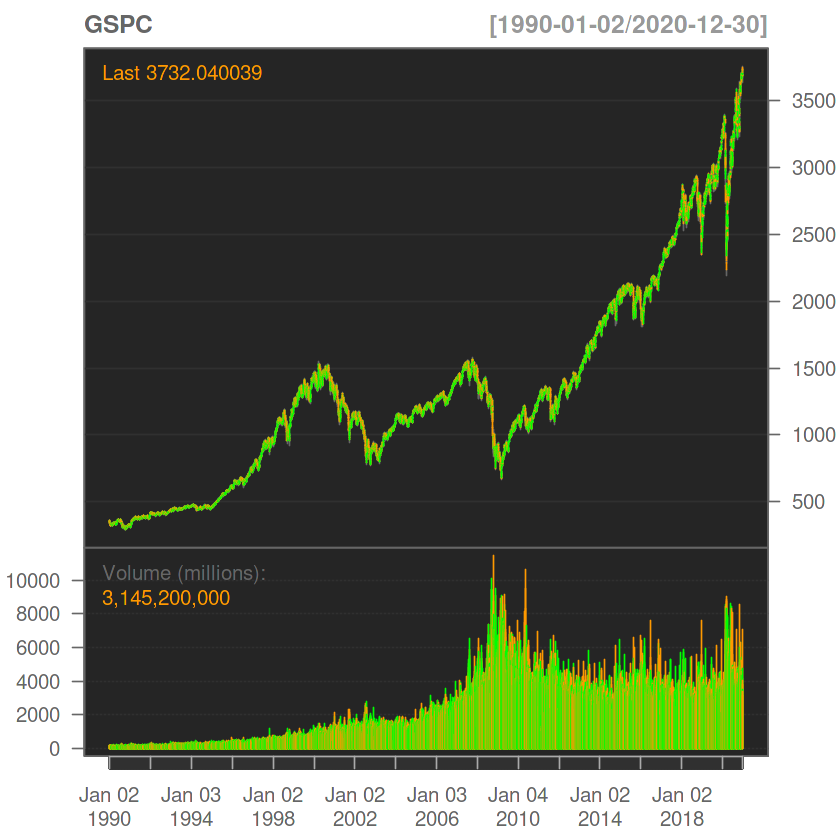

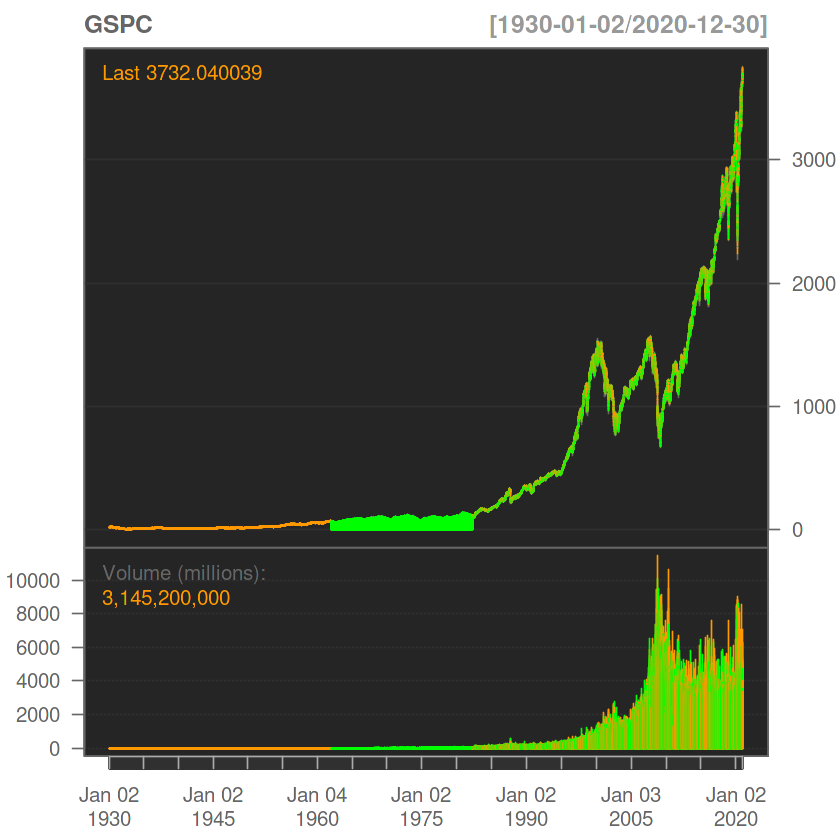

In [32]:
chartSeries(GSPC, subset = "1990::2020")
chartSeries(GSPC)